# Polynomials and ratios

Nicolas Oulianov

## Introduction

The linear regression model is a method to approximate coefficients of linear functions. That is, in function that, in 1D, look like $f(x) = ax + b$, find the best $a$ and $b$. Here, $x$ is the data collected, and $f(x)$ what's to be predicted. 

In $n$ dimension, the previous equation is equivalent to this one $f(x) = <a, x> + b$, where $f(x), b \in \mathbb{R}$, and $a, x \in \mathbb{R^n}$

Now, what if $f(x)$ isn't a function as simple as above ? 

In this notebook, I'll present some handy methods that deal with tricky cases.


In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
sns.set(style="darkgrid")

## Polynomials

Polynomials equations look like that : 

$\forall x \in \mathbb{R}, f(x) = \sum_{i=0}^{n}a_ix^i$

Fortunately, they can be rewriten as a standard linear equation, assuming $x$ is fixed. 

Let $x \in \mathbb{R}$ fixed.

Let's denote $X = (x_1, \dots, x_n) \in \mathbb{R}^n$, where $\forall i \in \{ 1, \dots, n \} , x_i = x^i$

Then $f(x) = f(X) = <a, X> + b$, which is a linear equation that is easily solvable. 

Now, let's see how it looks with code on a simple $n=3$ case. 

In [145]:
# Number of observations
n = 200

# features vector
x = np.linspace(0, 10, n)

# f(x), the values we try to predict
a, b, c, d = 40, 10, -1.5, 0.4
f_x = a + b*x + c*x**2 + d*x**3

# Add gaussian noise to the data.
f_x_noisy = f_x + (np.random.randn(n)*15)

# Estimate a, b, c, d using linear regression
model = LinearRegression()

# Transformation
def add_n_powers(x, n):
    X = []
    for i in range(1, n+1):
        X.append(x**i)
    return np.array(X).T

X = add_n_powers(x, 3)
model.fit(X, f_x_noisy)
f_x_estimated = model.predict(X)

# Plotting
def visualisation():
    fig = plt.figure(figsize=(10, 8)) # change figsize
    sns.lineplot(x, f_x, color="red")
    sns.scatterplot(x, f_x_noisy)
    sns.lineplot(x, f_x_estimated, color="cyan")
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend(['true f(x)', 'estimated f(x)', 'noisy f(x) values'])
    plt.show()

Now, let's compare the true coefficients with those estimated. 

In [146]:
results = pd.DataFrame()
results['Real value'] = [a,b,c,d]
results['Estimated value'] = [model.intercept_] + list(model.coef_)
results['% Difference'] = 100*(results['Estimated value'] - results['Real value'])/results['Real value']

print('Estimation risk :', np.var(model.predict(X) - f_x))

print('Coefficient values error :')
results

Estimation risk : 1.1597251241132382
Coefficient values error :


,Real value,Estimated value,% Difference
0,40.0,39.256790,-1.858024
1,10.0,7.248515,-27.514855
2,-1.5,-0.741707,-50.552851
3,0.4,0.347700,-13.074911


Even if the coefficient values aren't exactly the same, the estimation risk is very low. Indeed, even if the exact coefficients values haven't been found, the true curve has been approximated very well. This can be seen on the plot above. 

## Ratios

Let's consider other kinds of function that involve ratios. These are mostly common in business and marketing. The simplest example can be :

$\forall x, y \in \mathbb{R}, f(x, y) = a + bx + c\frac{y}{x}$

Let's take an example. $f(x)$ could be the value of a customer sale, $x$ could be the number of articles bought, and $\frac{y}{x}$ the average marketing expenses for bought products. By finding the coefficients of this equation, you try to understand customer behaviour. How much are marketing expenses positively impacting sales ? 

This function is not linear. But, with fixed $x$ and $y$, one can be tempted to perform a transformation similar to the one above, and to state

Let $X=(x1, x2) \in \mathbb{R}^2$, such as $x_1 = x$ and $x_2 = \frac{y}{x}$

We have then $f(x,y) = f(X) = a + <\beta, X>$ which is a linear equation.

Let's try that. 

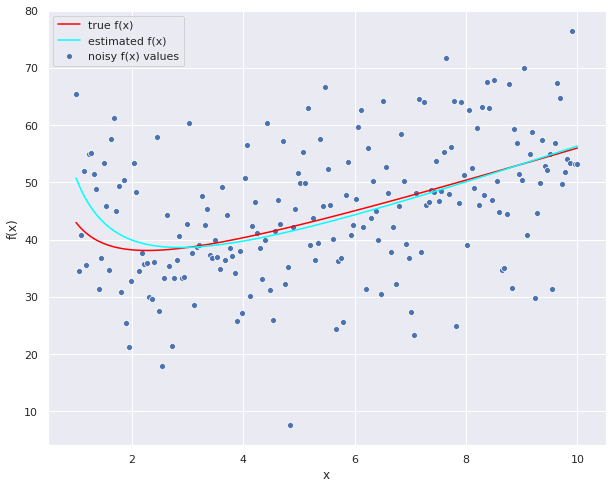

In [227]:
# Number of observations
n = 200

# features vectors
x = np.linspace(1, 10, n) 
y = np.linspace(2, 6, n)

# f(x), the values we try to predict
a, b, c = 20, 3, 10
f_x = a + b*x + c*y/x

# Add gaussian noise to the data.
f_x_noisy = f_x + (np.random.randn(n)*10)

# Estimate a, b, c, d using linear regression
model = LinearRegression()

# Transformation
X = np.array([x, y/x]).T
model.fit(X, f_x_noisy)
f_x_estimated = model.predict(X)

# Plotting
# We plot only according to the x axis. 
visualisation()

In [228]:
results = pd.DataFrame()
results['Real value'] = [a,b,c]
results['Estimated value'] = [model.intercept_] + list(model.coef_)
results['% Difference'] = 100*(results['Estimated value'] - results['Real value'])/results['Real value']

print('Estimation risk :', np.var(model.predict(X) - f_x))

print('Coefficient values error :')
results

Estimation risk : 2.4729798451872846
Coefficient values error :


,Real value,Estimated value,% Difference
0,20,10.470981,-47.645093
1,3,3.483758,16.125282
2,10,18.410085,84.100848


The results are not _too_ bad risk-wise, but the coefficient estimation is pretty bad. And, as soon as the $c$ coefficient is too small compared to $b$, then the model yields very bad values. 

This is due to the fact that $\frac{1}{x}$ is much, much smaller than $x$, especially for large values of x. Thus, for the model tend to consider $\frac{1}{x}$ as noise.

The solution to find better coefficients is too perform another transformation. Given fixed $x, y \in \mathbb{R}$, 

Let $g(x, y) = xf(x,y) = ax + bx^2 + cy$

Let $X \in \mathbb{R}^3 = (x, x^2, y)$

Thus, $g(x, y) = <beta, X>$ which is a linear equation. 

Now, using this last transformation, perform a linear regression on $g(x, y)$ to find $a, b,$ and $c$. Notice that the coefficients found this way are still the same that those of $f$ !

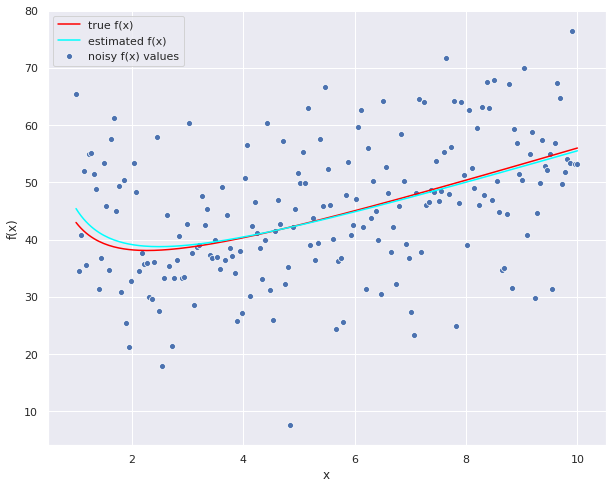

In [229]:
# Estimate a, b, c, d using linear regression
model_2 = LinearRegression(fit_intercept=False)

# Transformation
f_x_transform = f_x_noisy*x
X = np.array([x, x**2, y]).T
model_2.fit(X, f_x_transform)
f_x_estimated = model_2.predict(X)/x

# Plotting
# We plot only according to the x axis. 
visualisation()

In [230]:
results = pd.DataFrame()
results['Real value'] = [a,b,c]
results['Estimated value'] = model_2.coef_
results['% Difference'] = 100*(results['Estimated value'] - results['Real value'])/results['Real value']

print('Estimation risk :', np.var(model_2.predict(X)/x - f_x))

print('Coefficient values error :')
results

Estimation risk : 0.38749195225440813
Coefficient values error :


,Real value,Estimated value,% Difference
0,20,18.659125,-6.704375
1,3,2.971588,-0.947056
2,10,11.897648,18.976477


With this last transformation, the estimation risk is sometimes slightly higher, but coefficients' values are much closer. 

Note that this does not always perform better than the first one. It depends on the $x$ and $y$ data range, and also the noise level. In a production setting, it's best to try with both approaches and take the tim

## Logistic curves

In [181]:
model_2.coef_

array([18.59803765,  3.03185299, 10.68255022])